In [1]:
import spatialproteomics as sp
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d
import pandas as pd


In [2]:
medfilt2d??

Signature: medfilt2d(input, kernel_size=3)
Source:   
def medfilt2d(input, kernel_size=3):
    """
    Median filter a 2-dimensional array.

    Apply a median filter to the `input` array using a local window-size
    given by `kernel_size` (must be odd). The array is zero-padded
    automatically.

    Parameters
    ----------
    input : array_like
        A 2-dimensional input array.
    kernel_size : array_like, optional
        A scalar or a list of length 2, giving the size of the
        median filter window in each dimension.  Elements of
        `kernel_size` should be odd.  If `kernel_size` is a scalar,
        then this scalar is used as the size in each dimension.
        Default is a kernel of size (3, 3).

    Returns
    -------
    out : ndarray
        An array the same size as input containing the median filtered
        result.

    See Also
    --------
    scipy.ndimage.median_filter

    Notes
    -----
    This is faster than `medfilt` when the input dtype is ``

In [3]:
image_2_4 = imread("/dss/dsshome1/00/ge65tib2/2-4__HE__histo.ome.tif")
image_5_5 = imread("/dss/dsshome1/00/ge65tib2/5-5__HE__histo.ome.tif")

image_2_4.shape
image_5_5.shape

image_2_4 = image_2_4.transpose(2, 0, 1)
image_2_4.shape

image_5_5 = image_5_5.transpose(2, 0, 1)
image_5_5.shape

(40, 2792, 3084)

In [4]:
markers = ['DAPI', 'SOX2', 'FAP', 'cxcr3', 'LRRC15', 'CD20', 'CD68', 'CD45RO', 'CD31', 'PD-1', 'Ki67', 'Keratin 5', 'CD4', 'IFNG', 'SMA', 'CD66', 'Podoplanin', 'CXCR4', 'PGRN', 'Granzyme B', 'Pan-Cytokeratin', 'MARCO', 'CD56', 'HAS1', 'CD107a', 'b-Catenin1', 'HLA-A', 'HLA-DR', 'CD8', 'PDL1', 'TP63', 'GATA6', 'CD34', 'TCF-1', 'Bcl-2', 'PCNA', 'CLDN18', 'CD3e', 'MCT4', 'LAG3']
sp_object_2_4 = sp.load_image_data(image_2_4, channel_coords=markers)
sp_object_5_5 = sp.load_image_data(image_5_5, channel_coords=markers)



In [5]:
sp_object_2_4

<xarray.Dataset> Size: 265MB
Dimensions:   (channels: 40, y: 2501, x: 2644)
Coordinates:
  * channels  (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'CD3e' 'MCT4' 'LAG3'
  * y         (y) int64 20kB 0 1 2 3 4 5 6 ... 2495 2496 2497 2498 2499 2500
  * x         (x) int64 21kB 0 1 2 3 4 5 6 ... 2638 2639 2640 2641 2642 2643
Data variables:
    _image    (channels, y, x) uint8 265MB 2 2 3 2 2 2 2 2 2 ... 3 2 1 2 2 1 1 1

In [6]:
sp_object_5_5

<xarray.Dataset> Size: 344MB
Dimensions:   (channels: 40, y: 2792, x: 3084)
Coordinates:
  * channels  (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'CD3e' 'MCT4' 'LAG3'
  * y         (y) int64 22kB 0 1 2 3 4 5 6 ... 2786 2787 2788 2789 2790 2791
  * x         (x) int64 25kB 0 1 2 3 4 5 6 ... 3078 3079 3080 3081 3082 3083
Data variables:
    _image    (channels, y, x) uint8 344MB 2 2 2 1 1 2 1 2 1 ... 2 2 1 2 2 2 2 2

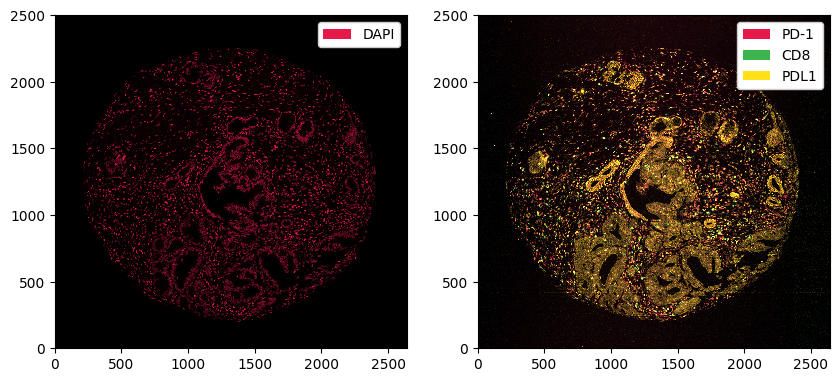

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_2_4.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_2_4.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])


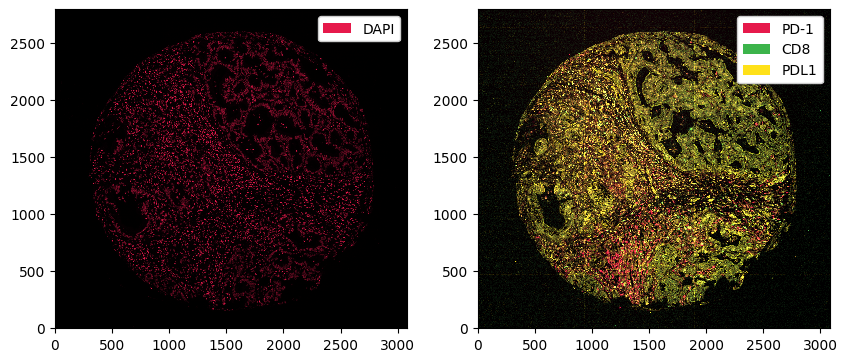

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_5_5.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_5_5.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])

In [23]:
def multiply_array(arr, factor=10):
    return (arr * factor).clip(0, 255).astype("uint8")

percentiles = [0.6] * 1 + [0.95] * 39

sp_object_2_4 = sp_object_2_4.pp.threshold(percentiles).pp.apply(medfilt2d, kernel_size=3)
sp_object_2_4 = sp_object_2_4.pp.apply(func=multiply_array)
sp_object_5_5 = sp_object_5_5.pp.threshold(percentiles).pp.apply(medfilt2d, kernel_size=3)
sp_object_5_5 = sp_object_5_5.pp.apply(func=multiply_array)


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_2_4.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_2_4.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_5_5.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_5_5.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])

In [11]:
ds_cellpose_2_4 = sp_object_2_4.tl.cellpose(channel="DAPI", model_type='nuclei')



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	linux 
python version: 	3.10.18 
torch version:  	2.7.1+cu126! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




** TORCH CUDA version installed and working. **
>>>> using GPU (CUDA)
>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/cpsam


In [12]:
ds_cellpose_5_5 = sp_object_5_5.tl.cellpose(channel="DAPI", model_type='nuclei')


** TORCH CUDA version installed and working. **
>>>> using GPU (CUDA)
>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/cpsam


In [13]:
ds_cellpose_2_4

<xarray.Dataset> Size: 278MB
Dimensions:        (channels: 40, y: 2501, x: 2644, cells: 3811, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 20kB 0 1 2 3 4 5 ... 2495 2496 2497 2498 2499 2500
  * x              (x) int64 21kB 0 1 2 3 4 5 ... 2638 2639 2640 2641 2642 2643
  * cells          (cells) int64 30kB 1 2 3 4 5 6 ... 3807 3808 3809 3810 3811
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 265MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    _segmentation  (y, x) uint16 13MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 61kB 199.2 1.375e+03 ... 1.368e+03

In [14]:
ds_cellpose_5_5

<xarray.Dataset> Size: 362MB
Dimensions:        (channels: 40, y: 2792, x: 3084, cells: 6722, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 22kB 0 1 2 3 4 5 ... 2786 2787 2788 2789 2790 2791
  * x              (x) int64 25kB 0 1 2 3 4 5 ... 3078 3079 3080 3081 3082 3083
  * cells          (cells) int64 54kB 1 2 3 4 5 6 ... 6718 6719 6720 6721 6722
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 344MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    _segmentation  (y, x) uint16 17MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 108kB 160.6 1.384e+03 ... 1.578e+03

In [16]:
help(sp_object_2_4.tl.cellpose)

Help on method cellpose in module spatialproteomics.tl.tool:

cellpose(channel: Optional[str] = None, key_added: str = '_segmentation', diameter: float = None, channel_settings: list = None, num_iterations: int = 2000, cellprob_threshold: float = 0.0, flow_threshold: float = 0.4, batch_size: int = 8, gpu: bool = True, model_type: str = 'cyto3', postprocess_func: Callable = <function ToolAccessor.<lambda> at 0x7f7f046ba7a0>, return_diameters: bool = False, **kwargs) method of spatialproteomics.tl.tool.ToolAccessor instance
    Segment cells using Cellpose. Adds a layer to the spatialproteomics object
    with dimension (X, Y) or (C, X, Y) dependent on whether channel argument
    is specified or not.
    
    Parameters
    ----------
    channel : str, optional
        Channel to use for segmentation. If None, all channels are used for independent segmentation.
    key_added : str, optional
        Key to assign to the segmentation results.
    diameter : float, optional
        Expect

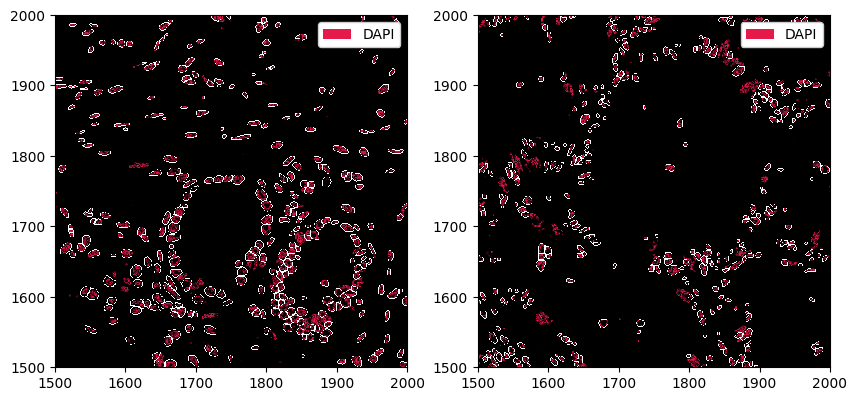

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# pp[100:200, 100:200] zoom in
_ = ds_cellpose_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1])


In [ ]:
ds_stardist_2_4 = sp_object_2_4.tl.stardist(channel="DAPI", key_added="_segmentation")
ds_stardist_5_5 = sp_object_5_5.tl.stardist(channel="DAPI", key_added="_segmentation")


2025-06-21 17:41:10.387970: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-21 17:41:10.388114: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found model '2D_versatile_fluo' for 'StarDist2D'.


2025-06-21 17:42:33.498617: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-21 17:42:33.500008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-21 17:42:33.500610: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-06-

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [ ]:
ds_stardist_2_4

In [ ]:
ds_stardist_5_5

In [ ]:
# plotting the segmentation
fix, ax = plt.subplots(1, 2, figsize=(16, 8))
_ = ds_stardist_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.colorize("blue").pl.show(render_segmentation=True, ax=ax[0])
_ = ds_stardist_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.colorize("blue").pl.show(render_segmentation=True, ax=ax[1])


area           15.000000
centroid-0    198.038314
centroid-1    209.963855
dtype: float64

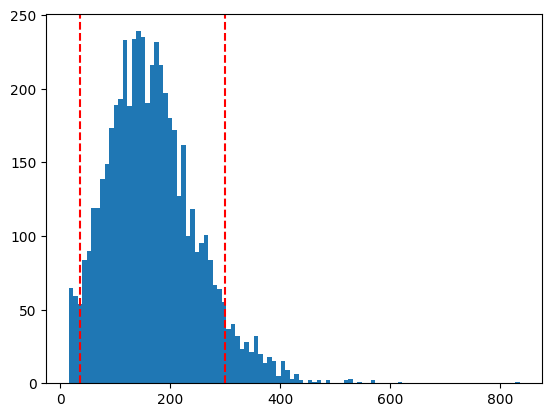

In [53]:
ds_cellpose_2_4 = ds_cellpose_2_4.pp.add_observations("area")
df_cellpose_2_4 = ds_cellpose_2_4.pp.get_layer_as_df("_obs")
_ = plt.hist(df_cellpose_2_4["area"], bins=100)
_ = plt.axvline(x=35, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=300, color='red', linestyle='--', label='x = 250')
Min_value= df_cellpose_2_4.min()
Min_value

area           15.000000
centroid-0    150.734694
centroid-1    290.514286
dtype: float64

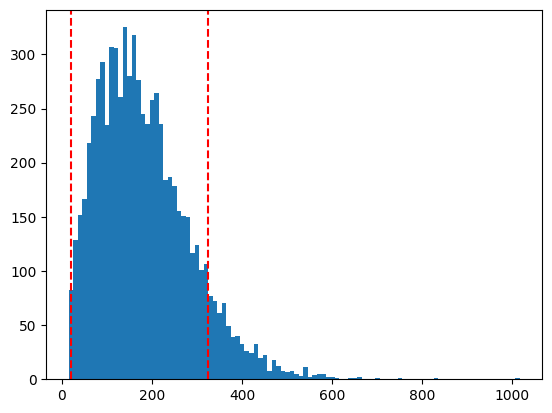

In [65]:
ds_cellpose_5_5 = ds_cellpose_5_5.pp.add_observations("area")
df_cellpose_5_5 = ds_cellpose_5_5.pp.get_layer_as_df("_obs")
_ = plt.hist(df_cellpose_5_5["area"], bins=100)
_ = plt.axvline(x=20, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=325, color='red', linestyle='--', label='x = 250')
Min_value= df_cellpose_5_5.min()
Min_value

area           15.000000
centroid-0    198.038314
centroid-1    209.963855
dtype: float64

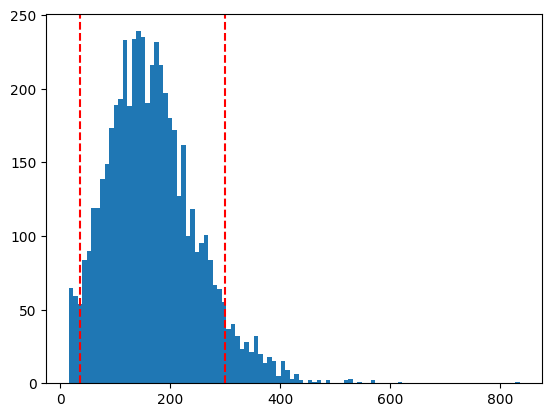

In [69]:
ds_stardist_2_4 = ds_stardist_2_4.pp.add_observations("area")
df_stardist_2_4 = ds_stardist_2_4.pp.get_layer_as_df("_obs")
_ = plt.hist(df_stardist_2_4["area"], bins=100)
_ = plt.axvline(x=35, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=300, color='red', linestyle='--', label='x = 250')
Min_value= df_stardist_2_4.min()
Min_value


area           15.000000
centroid-0    150.734694
centroid-1    290.514286
dtype: float64

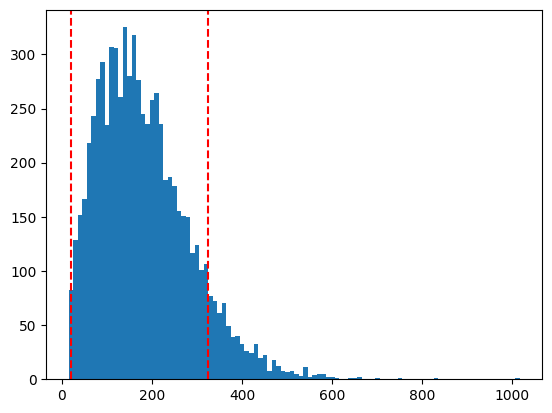

In [68]:
ds_stardist_5_5 = ds_stardist_5_5.pp.add_observations("area")
df_stardist_5_5 = ds_stardist_5_5.pp.get_layer_as_df("_obs")
_ = plt.hist(df_stardist_5_5["area"], bins=100)
_ = plt.axvline(x=20, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=325, color='red', linestyle='--', label='x = 250')
Min_value= df_stardist_5_5.min()
Min_value

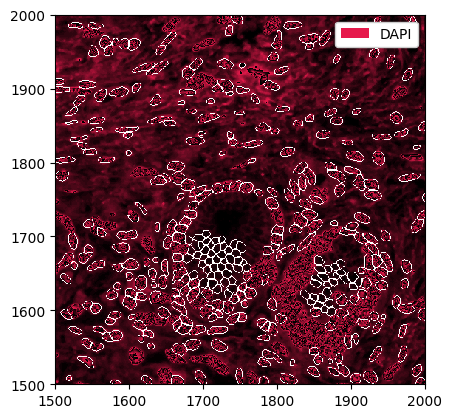

In [73]:
ds_stardist_2_4 = ds_stardist_2_4.pp.filter_by_obs("area", func=lambda x: (x > 35) & (x < 300))
# plotting the result
_ = ds_stardist_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True)



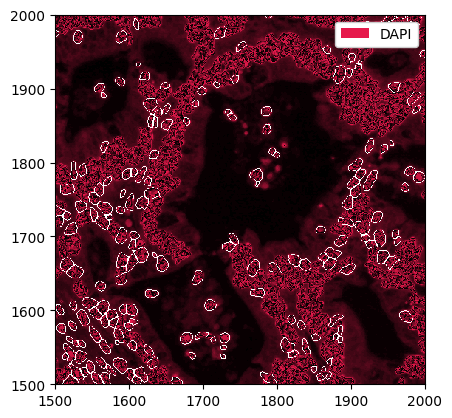

In [74]:
ds_stardist_5_5 = ds_stardist_5_5.pp.filter_by_obs("area", func=lambda x: (x > 20) & (x < 325))
# plotting the result
_ = ds_stardist_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True)


In [75]:
ds_stardist_2_4 = ds_stardist_2_4.pp.grow_cells(iterations=2)
ds_stardist_2_4

Mask growing requires recalculation of the observations. All features other than the centroids will be removed and should be recalculated with pp.add_observations().


<xarray.Dataset> Size: 304MB
Dimensions:                     (channels: 40, y: 2501, x: 2644, cells: 4867,
                                 features: 2)
Coordinates:
  * channels                    (channels) <U15 2kB 'DAPI' 'SOX2' ... 'LAG3'
  * y                           (y) int64 20kB 0 1 2 3 4 ... 2497 2498 2499 2500
  * x                           (x) int64 21kB 0 1 2 3 4 ... 2640 2641 2642 2643
  * cells                       (cells) int64 39kB 1 2 3 4 ... 4865 4866 4867
  * features                    (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image                      (channels, y, x) uint8 265MB 0 0 0 0 ... 0 0 0 0
    _segmentation_stardist_2_4  (y, x) int32 26MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    _segmentation               (y, x) uint16 13MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    _obs                        (cells, features) float64 78kB 197.4 ... 1.29...

In [76]:
ds_stardist_5_5 = ds_stardist_5_5.pp.grow_cells(iterations=2)
ds_stardist_5_5

Mask growing requires recalculation of the observations. All features other than the centroids will be removed and should be recalculated with pp.add_observations().


<xarray.Dataset> Size: 396MB
Dimensions:                     (channels: 40, y: 2792, x: 3084, cells: 6517,
                                 features: 2)
Coordinates:
  * channels                    (channels) <U15 2kB 'DAPI' 'SOX2' ... 'LAG3'
  * y                           (y) int64 22kB 0 1 2 3 4 ... 2788 2789 2790 2791
  * x                           (x) int64 25kB 0 1 2 3 4 ... 3080 3081 3082 3083
  * cells                       (cells) int64 52kB 1 2 3 4 ... 6515 6516 6517
  * features                    (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image                      (channels, y, x) uint8 344MB 0 0 0 0 ... 0 0 0 0
    _segmentation_stardist_5_5  (y, x) int32 34MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    _segmentation               (y, x) uint16 17MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    _obs                        (cells, features) float64 104kB 153.9 ... 1.6...

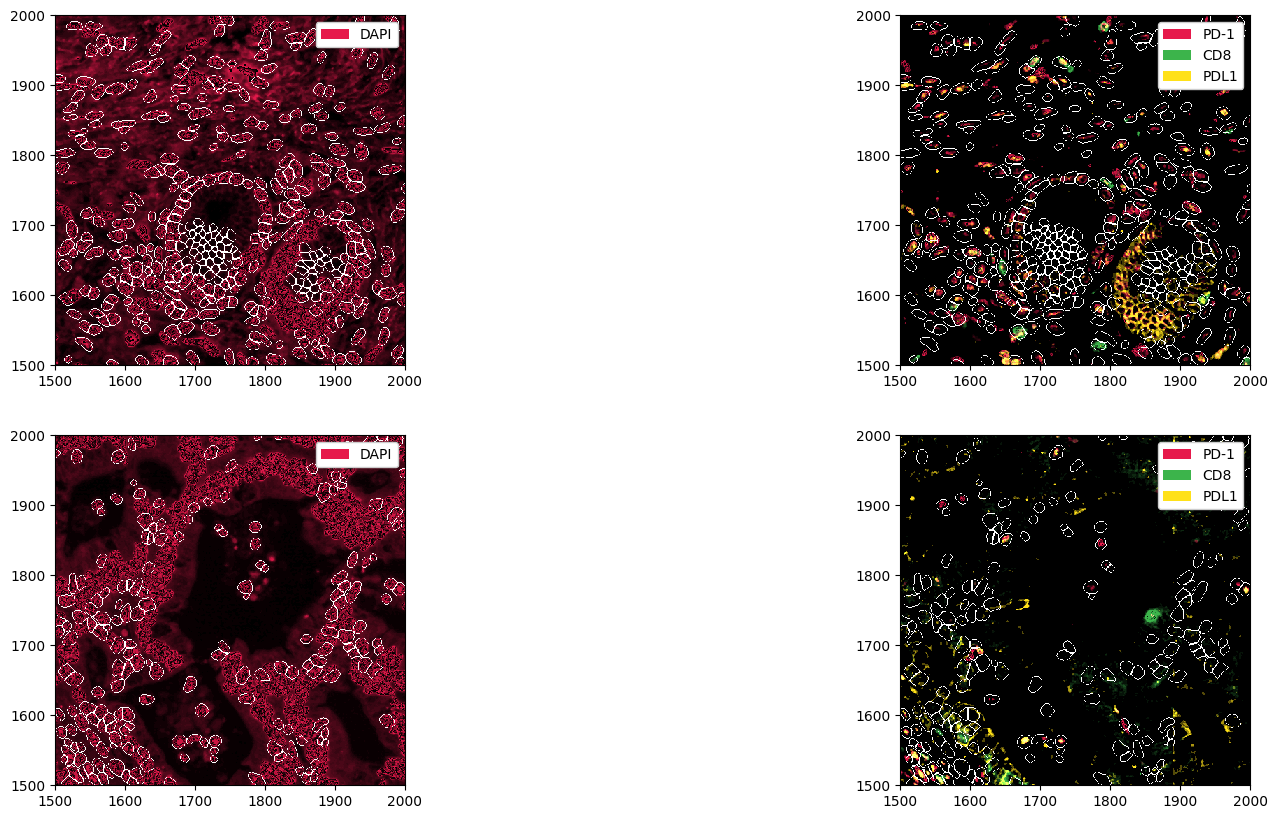

In [78]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
_ = ds_stardist_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0,0])
_ = ds_stardist_2_4.pp[['PD-1', 'CD8', 'PDL1']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0,1])
_ = ds_stardist_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1,0])
_ = ds_stardist_5_5.pp[['PD-1', 'CD8', 'PDL1']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1,1])

In [ ]:
help(sp_object.pp.transform_expression_matrix)

Help on method transform_expression_matrix in module spatialproteomics.pp.preprocessing:

transform_expression_matrix(method: str = 'arcsinh', key: str = '_intensity', key_added: str = '_intensity', cofactor: float = 5.0, min_percentile: float = 1.0, max_percentile: float = 99.0, **kwargs) method of spatialproteomics.pp.preprocessing.PreprocessingAccessor instance
    Transforms the expression matrix based on the specified mode.
    
    Parameters:
        method (str): The transformation method. Available options are "arcsinh", "zscore", "minmax", "double_zscore", and "clip".
        key (str): The key of the expression matrix in the object.
        key_added (str): The key to assign to the transformed matrix in the object.
        cofactor (float): The cofactor to use for the "arcsinh" transformation.
        min_percentile (float): The minimum percentile value to use for the "clip" transformation.
        max_percentile (float): The maximum percentile value to use for the "clip" tr

In [86]:
import os
import shutil

In [94]:
# other methods called  "arcsinh", "zscore", "minmax", "double_zscore", and "clip'
sp_object_1= ds_stardist_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="arcsinh")
sp_object_1

# putting the expression matrix into an anndata object
adata = sp_object_1.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/2_4_stardist_arcsinh.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_arcsinh.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)
    
# exporting as zarr
sp_object_1.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_arcsinh.zarr")

In [95]:
# other methods called  "arcsinh", "zscore", "minmax", "double_zscore", and "clip'
sp_object_6= ds_stardist_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="arcsinh")
sp_object_6

# putting the expression matrix into an anndata object
adata = sp_object_6.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/5_5_stardist_arcsinh.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_arcsinh.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)
    
# exporting as zarr
sp_object_6.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_arcsinh.zarr")

In [96]:
sp_object_2= ds_stardist_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="zscore")
sp_object_2

# putting the expression matrix into an anndata object
adata = sp_object_2.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/2_4_stardist_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_2.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_zscore.zarr")

In [97]:
sp_object_7= ds_stardist_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="zscore")
sp_object_7

# putting the expression matrix into an anndata object
adata = sp_object_7.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/5_5_stardist_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_7.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_zscore.zarr")

In [99]:
sp_object_3= ds_stardist_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="double_zscore")
sp_object_3

# putting the expression matrix into an anndata object
adata = sp_object_3.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/2_4_stardist_double_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_double_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_3.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_double_zscore.zarr")

In [100]:
sp_object_8= ds_stardist_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="double_zscore")
sp_object_8

# putting the expression matrix into an anndata object
adata = sp_object_8.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/5_5_stardist_double_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_double_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_8.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_double_zscore.zarr")

In [101]:
sp_object_4 = ds_stardist_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="minmax")
sp_object_4

# putting the expression matrix into an anndata object
adata = sp_object_4.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/2_4_stardist_minmax.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_minmax.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_4.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_minmax.zarr")

In [102]:
sp_object_9 = ds_stardist_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="minmax")
sp_object_9

# putting the expression matrix into an anndata object
adata = sp_object_9.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/5_5_stardist_minmax.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_minmax.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_9.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_minmax.zarr")

In [103]:
sp_object_5 = ds_stardist_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="clip")
sp_object_5

# putting the expression matrix into an anndata object
adata = sp_object_5.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/2_4_stardist_clip.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_clip.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_5.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/2_4_stardist_clip.zarr")

In [104]:
sp_object_10 = ds_stardist_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="clip")
sp_object_10

# putting the expression matrix into an anndata object
adata = sp_object_10.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/5_5_stardist_clip.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_clip.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_10.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/5_5_stardist_clip.zarr")

In [105]:
spatialdata_object_1 = sp_object_1.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_1

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                


SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (40, 2644, 2501)
├── Labels
│     └── 'segmentation': DataArray[yx] (2644, 2501)
└── Tables
      └── 'table': AnnData (4867, 40)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), segmentation (Labels)

In [106]:
spatialdata_object_2 = sp_object_2.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_2

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                


SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (40, 2644, 2501)
├── Labels
│     └── 'segmentation': DataArray[yx] (2644, 2501)
└── Tables
      └── 'table': AnnData (4867, 40)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), segmentation (Labels)

In [107]:
spatialdata_object_3 = sp_object_3.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_3

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                


SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (40, 2644, 2501)
├── Labels
│     └── 'segmentation': DataArray[yx] (2644, 2501)
└── Tables
      └── 'table': AnnData (4867, 40)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), segmentation (Labels)

In [108]:
spatialdata_object_4 = sp_object_4.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_4

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                


SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (40, 2644, 2501)
├── Labels
│     └── 'segmentation': DataArray[yx] (2644, 2501)
└── Tables
      └── 'table': AnnData (4867, 40)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), segmentation (Labels)

In [109]:
spatialdata_object_5 = sp_object_5.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_5

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                


SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (40, 2644, 2501)
├── Labels
│     └── 'segmentation': DataArray[yx] (2644, 2501)
└── Tables
      └── 'table': AnnData (4867, 40)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), segmentation (Labels)

In [110]:
spatialdata_object_6 = sp_object_6.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_6
spatialdata_object_7 = sp_object_7.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_7
spatialdata_object_8 = sp_object_8.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_8
spatialdata_object_9 = sp_object_9.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_9
spatialdata_object_10 = sp_object_10.tl.convert_to_spatialdata(expression_matrix_key="_intensity")
spatialdata_object_10

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('y', 'x').                                
INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to 

SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (40, 3084, 2792)
├── Labels
│     └── 'segmentation': DataArray[yx] (3084, 2792)
└── Tables
      └── 'table': AnnData (6517, 40)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), segmentation (Labels)

In [112]:
spatialdata_object_1.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_2_4_stardist_arcsinh.zarr")
spatialdata_object_2.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_2_4_stardist_zscore.zarr")
spatialdata_object_3.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_2_4_stardist_double_zscore.zarr")
spatialdata_object_4.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_2_4_stardist_minmax.zarr")
spatialdata_object_5.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_2_4_stardist_clip.zarr")
spatialdata_object_6.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_5_5_stardist_arcsinh.zarr")
spatialdata_object_7.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_5_5_stardist_zscore.zarr")
spatialdata_object_8.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_5_5_stardist_double_zscore.zarr")
spatialdata_object_9.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_5_5_stardist_minmax.zarr")
spatialdata_object_10.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_5_5_stardist_clip.zarr")



INFO     The Zarr backing store has been changed from                                                              
         /dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_object_1.zarr the new file path:        
         /dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_2_4_stardist_arcsinh.zarr               
INFO     The Zarr backing store has been changed from                                                              
         /dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_object_2.zarr the new file path:        
         /dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_2_4_stardist_zscore.zarr                
INFO     The Zarr backing store has been changed from                                                              
         /dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialdata_object_3.zarr the new file path:        
         /dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/spatialda